# Machine Learning with Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
heart = pd.read_json('heartbeat.json')

In [3]:
heart['audio'] = [ np.array(audio) for audio in heart['audio'] ]

In [4]:
heart = heart.sample(frac=1, random_state=1)

In [5]:
heart['MEAN'] = heart['audio'].apply(np.mean)
heart['MIN'] = heart['audio'].apply(np.min)
heart['MAX'] = heart['audio'].apply(np.max)
heart['STD'] = heart['audio'].apply(np.std)

In [6]:
X = heart[['MEAN','MIN','MAX','STD']]
y = heart['label'] == 'normal'  # for a two-class problem

In [7]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()


In [10]:
from numpy.lib.stride_tricks import sliding_window_view
def envelope(x) :
  rectified = np.abs(x)
  v = sliding_window_view(rectified,50)
  return v.mean(axis=-1)

In [11]:
heart['env'] = heart['audio'].apply(envelope)

In [12]:
heart['env_MEAN'] = heart['env'].apply(np.mean)
heart['env_MIN'] = heart['env'].apply(np.min)
heart['env_MAX'] = heart['env'].apply(np.max)
heart['env_STD'] = heart['env'].apply(np.std)

In [13]:
X2 = heart[['env_MEAN','env_MIN','env_MAX','env_STD']]

In [14]:
def centroid(x) :
  v = sliding_window_view(x,50)
  ft = np.fft.rfft(v)
  sfx = np.sum( np.abs(ft.real) * np.arange(0,ft.shape[1]), axis=-1 )
  sx = np.sum( np.abs(ft.real), axis=-1 )
  return sfx/sx

In [15]:
heart['centroid'] = heart['audio'].apply(centroid)

In [16]:
heart['centroid_MEAN'] = heart['centroid'].apply(np.mean)
heart['centroid_MIN'] = heart['centroid'].apply(np.min)
heart['centroid_MAX'] = heart['centroid'].apply(np.max)
heart['centroid_STD'] = heart['centroid'].apply(np.std)

In [17]:
X3 = heart[['centroid_MEAN','centroid_MIN','centroid_MAX','centroid_STD']]

### Exercise




We have already eliminated the high-frequency noise using the smoothed envelopes. Try applying the FFT to these series to obtain a further set of features. Does this help with classification?

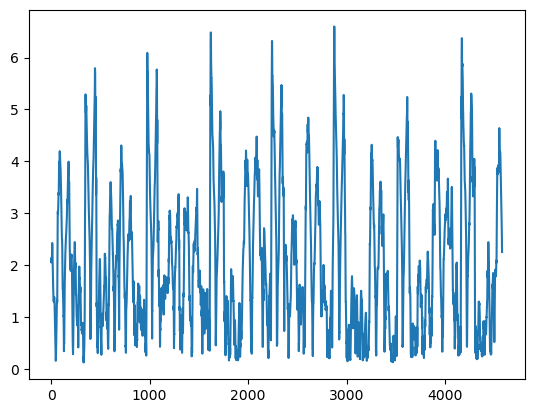

In [18]:
ct = centroid(heart['env'][0])

fig, ax = plt.subplots()
ax.plot( np.arange(0,len(ct)), ct )

plt.show()


In [19]:
heart['env_centroid'] = heart['env'].apply(centroid)

In [20]:
heart['env_centroid_MEAN'] = heart['env_centroid'].apply(np.mean)
heart['env_centroid_MIN'] = heart['env_centroid'].apply(np.min)
heart['env_centroid_MAX'] = heart['env_centroid'].apply(np.max)
heart['env_centroid_STD'] = heart['env_centroid'].apply(np.std)

In [21]:
X4 = heart[['env_centroid_MEAN','env_centroid_MIN','env_centroid_MAX','env_centroid_STD']]

In [22]:
# a 5-fold cross-validation, scored using AUC
score = cross_val_score( rfc,X4,y,cv=5,scoring='roc_auc' )
print("AUC scores:", score)
print("mean:", score.mean())

AUC scores: [0.68586957 0.7201087  0.63352273 0.60340909 0.56477273]
mean: 0.6415365612648223


In [23]:
Xt = pd.concat([X,X2,X3,X4],axis=1)
Xt.head()

,MEAN,MIN,MAX,STD,env_MEAN,env_MIN,env_MAX,env_STD,centroid_MEAN,centroid_MIN,centroid_MAX,centroid_STD,env_centroid_MEAN,env_centroid_MIN,env_centroid_MAX,env_centroid_STD
80,0.000042,-0.903423,0.994998,0.124084,0.056253,0.004614,0.264637,0.064619,8.464160,2.994041,15.583100,2.943780,1.953636,0.180404,6.045176,1.378894
267,0.000161,-0.535989,0.576830,0.075546,0.037779,0.006368,0.182670,0.041088,6.733309,2.923761,13.117688,1.548941,2.214224,0.218575,5.112467,1.415138
309,-0.000052,-0.607702,1.000297,0.084273,0.034250,0.004394,0.283078,0.046094,7.073892,2.748130,13.352981,1.825136,1.536248,0.189000,6.506724,1.191869
187,0.000073,-1.047319,1.100843,0.185147,0.079998,0.010624,0.419603,0.096860,6.224959,2.528634,15.555746,1.790499,2.097770,0.154581,5.597681,1.485746
105,-0.000289,-1.126752,1.097301,0.223434,0.144013,0.007003,0.428566,0.104801,8.221043,2.392787,15.123310,2.470218,1.606370,0.144650,5.597572,1.175283


In [24]:
# a 5-fold cross-validation, scored using AUC
score = cross_val_score( rfc,Xt,y,cv=5,scoring='roc_auc' )
print("AUC scores:", score)
print("mean:", score.mean())

AUC scores: [0.82663043 0.76630435 0.76988636 0.74261364 0.69659091]
mean: 0.760405138339921


Have a look at some examples of the two abnormal heartbeat patterns and compare to the normal ones. Can you come up with any additional summary features that might be informative in classification?

In [25]:
heart.query( "label == 'normal'").head()

,label,audio,length,MEAN,MIN,MAX,STD,env,env_MEAN,env_MIN,...,centroid,centroid_MEAN,centroid_MIN,centroid_MAX,centroid_STD,env_centroid,env_centroid_MEAN,env_centroid_MIN,env_centroid_MAX,env_centroid_STD
267,normal,"[0.0040481733, 0.0108921621, 0.014270050500000...",1329,0.000161,-0.535989,0.576830,0.075546,"[0.008812356192, 0.008760235172000001, 0.00861...",0.037779,0.006368,...,"[6.111370458468641, 6.325664746807206, 6.10121...",6.733309,2.923761,13.117688,1.548941,"[1.5206052643671177, 1.68178757796466, 1.92381...",2.214224,0.218575,5.112467,1.415138
309,normal,"[-0.0024397988000000002, -0.0021576649, 0.0029...",6890,-0.000052,-0.607702,1.000297,0.084273,"[0.007811065128, 0.007849338462, 0.0078437799,...",0.034250,0.004394,...,"[6.238339941618039, 6.040226001317942, 5.89775...",7.073892,2.748130,13.352981,1.825136,"[0.289118185225424, 0.30367205219611976, 0.285...",1.536248,0.189000,6.506724,1.191869
187,normal,"[0.0020207968, -0.0047798827, -0.0225561708, -...",3823,0.000073,-1.047319,1.100843,0.185147,"[0.031552138894, 0.032539761146, 0.03385444217...",0.079998,0.010624,...,"[5.521702356404088, 6.342490622663392, 5.82485...",6.224959,2.528634,15.555746,1.790499,"[0.8296203517310352, 0.8052030420571479, 0.721...",2.097770,0.154581,5.597681,1.485746
311,normal,"[0.0020320392, 0.0063474523000000005, 0.006983...",5411,0.000087,-0.628864,0.854936,0.071717,"[0.007721113000000001, 0.0077223590919999995, ...",0.029355,0.003146,...,"[5.3532239078130575, 6.707908256024845, 5.7982...",6.134006,2.126470,12.290053,1.586325,"[1.2248677973964388, 1.3207737363102046, 1.491...",1.916848,0.155479,5.716671,1.340106
225,normal,"[0.0080697136, 0.0125524299, 0.0131220585, 0.0...",14673,-0.000548,-1.031679,0.624756,0.090702,"[0.021310916682000004, 0.022072564410000002, 0...",0.042358,0.003877,...,"[8.30607573982035, 7.698998335190135, 7.685135...",7.394062,2.297987,16.121970,2.552710,"[3.3295335219873397, 3.295937599834239, 3.2748...",2.249267,0.176528,6.801731,1.366846


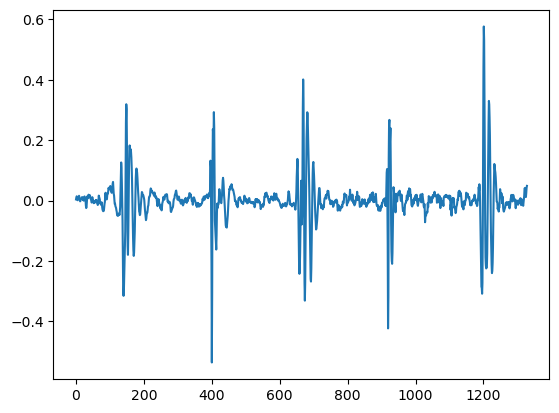

In [26]:
audio = heart['audio'].loc[267]

fig, ax = plt.subplots()
ax.plot( np.arange(0,len(audio)), audio )
#ax.set(xlabel='Time (ms)', ylabel='Sound Amplitude')
plt.show()

In [27]:
heart.query( "label == 'murmur'").head()

,label,audio,length,MEAN,MIN,MAX,STD,env,env_MEAN,env_MIN,...,centroid,centroid_MEAN,centroid_MIN,centroid_MAX,centroid_STD,env_centroid,env_centroid_MEAN,env_centroid_MIN,env_centroid_MAX,env_centroid_STD
80,murmur,"[0.0115468428, 0.0287530441, 0.0250033941, 0.0...",3190,0.000042,-0.903423,0.994998,0.124084,"[0.009038377802000001, 0.009156296576, 0.00873...",0.056253,0.004614,...,"[7.143155611694284, 6.402799266280474, 7.72405...",8.464160,2.994041,15.583100,2.943780,"[0.31368498481283175, 0.35303888030382297, 0.2...",1.953636,0.180404,6.045176,1.378894
105,murmur,"[0.0043964274, 0.0011806972, -0.01136844980000...",10253,-0.000289,-1.126752,1.097301,0.223434,"[0.016585035772, 0.01694919903, 0.017693699564...",0.144013,0.007003,...,"[4.8286626158519175, 6.251721166028596, 6.5837...",8.221043,2.392787,15.123310,2.470218,"[1.5463038063359102, 1.592019151405682, 1.5231...",1.606370,0.144650,5.597572,1.175283
89,murmur,"[-0.008204909, -0.004071502, 0.000208841600000...",7776,0.000351,-0.433152,0.468296,0.068893,"[0.017476605122, 0.018357238082, 0.01898276636...",0.041247,0.004701,...,"[5.824626485624113, 6.767132903801061, 5.21743...",7.442981,2.141215,15.694276,2.422716,"[3.733800746870422, 3.6122164249395, 3.5159789...",1.445540,0.143202,4.835221,0.959798
58,murmur,"[-0.003823027, -0.0308949165, -0.0178145114, -...",13807,-0.000077,-1.060645,1.127550,0.144704,"[0.04420149181, 0.044542502872, 0.044285406953...",0.089123,0.006857,...,"[9.936155404425328, 7.092309867754699, 7.81666...",7.746284,2.530566,14.273527,1.924094,"[0.6058433548209012, 0.5855228818270531, 0.566...",1.411019,0.149072,5.411581,1.057593
59,murmur,"[-0.063678436, -0.077732414, -0.051293999, -0....",3619,-0.000012,-0.732351,0.828259,0.107320,"[0.04609125510599999, 0.045832136504000004, 0....",0.069386,0.015381,...,"[5.734191078835382, 7.050450479987843, 6.43736...",9.033381,2.812476,16.185194,2.678665,"[0.4257856026793736, 0.36733997369088806, 0.49...",1.389963,0.185415,4.833183,0.993548


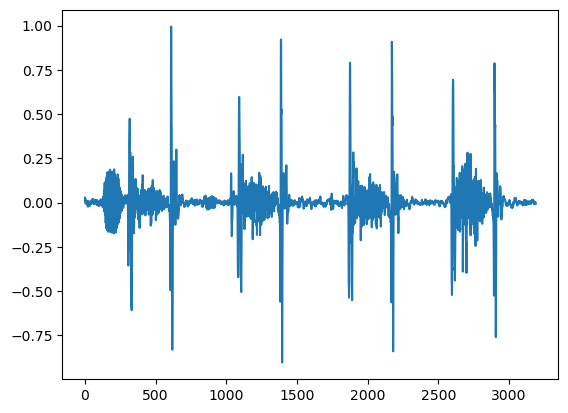

In [28]:
audio = heart['audio'].loc[80]

fig, ax = plt.subplots()
ax.plot( np.arange(0,len(audio)), audio )
#ax.set(xlabel='Time (ms)', ylabel='Sound Amplitude')
plt.show()

In [29]:
heart.query( "label == 'extrastole'").head()

,label,audio,length,MEAN,MIN,MAX,STD,env,env_MEAN,env_MIN,...,centroid,centroid_MEAN,centroid_MIN,centroid_MAX,centroid_STD,env_centroid,env_centroid_MEAN,env_centroid_MIN,env_centroid_MAX,env_centroid_STD
18,extrastole,"[-0.0218328834, -0.0330601186, -0.0215717703, ...",5123,0.000058,-1.094524,1.132704,0.110569,"[0.019076874444, 0.018645657152000002, 0.01824...",0.048243,0.007249,...,"[5.384876944268381, 7.0060838082856, 5.3337429...",6.389330,2.294631,14.055681,1.525840,"[0.6970850060377014, 0.5031713337500039, 0.350...",1.812010,0.170191,6.658765,1.361734
11,extrastole,"[0.0046789329, -0.0021600183, -0.0208352134, -...",2394,0.000054,-0.840943,0.697979,0.102633,"[0.06748588219, 0.079524144714, 0.087537240458...",0.052411,0.010075,...,"[8.541647784192007, 7.684902729573135, 5.65359...",6.775122,2.600339,14.779080,2.250601,"[1.2459893338045487, 0.7118850342932068, 0.418...",1.829336,0.149638,5.331129,1.140585
12,extrastole,"[0.0136000635, 0.0154560674, 0.001971947, 9.87...",8463,0.000275,-0.658933,0.872499,0.102174,"[0.029347606492, 0.029170572744, 0.02901993336...",0.048663,0.007318,...,"[6.437445286411086, 6.877747828411427, 6.46530...",6.142191,2.552146,12.822118,1.495374,"[2.1013929048508966, 2.0957742918056916, 1.998...",1.749042,0.135744,5.919658,1.277519
27,extrastole,"[-0.0187703297, -0.0289737582, -0.0220682062, ...",4129,-0.000632,-0.572244,0.670583,0.072487,"[0.013754651974, 0.013728728236, 0.01342788139...",0.036712,0.006134,...,"[5.101161477766148, 7.889009969118688, 5.50907...",6.091954,2.021147,13.878923,1.610957,"[1.323646761793647, 1.572206536523948, 1.97445...",1.685456,0.144467,5.599526,1.227497
29,extrastole,"[-0.0034342371, -0.0013775155000000001, -0.006...",12103,0.000023,-0.742943,0.514471,0.034999,"[0.006740782284000001, 0.006715063750000001, 0...",0.018231,0.003229,...,"[10.833074634505547, 10.778707682332309, 10.66...",7.420562,3.017834,14.589417,1.711627,"[0.871351834382323, 1.1632464668855493, 1.2012...",1.653665,0.169782,5.988934,1.146912


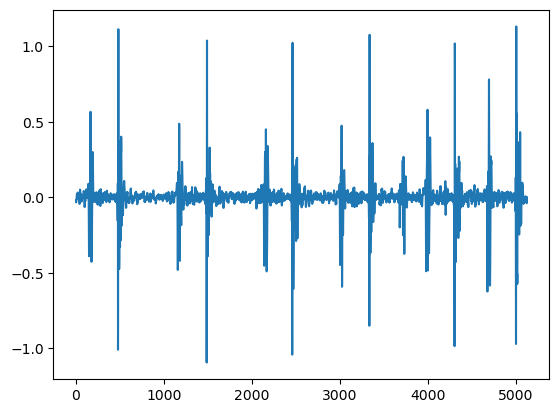

In [30]:
audio = heart['audio'].loc[18]

fig, ax = plt.subplots()
ax.plot( np.arange(0,len(audio)), audio )
#ax.set(xlabel='Time (ms)', ylabel='Sound Amplitude')
plt.show()